__<h3>Greeks</h3>__

Greeks are used as a risk measure on a portfolio of options. Investors use greeks to hedge their positions. It involves calculation of greeks such as delta,gamma,theta,rho,vega & charm. 

__Delta__

- when the value of the spot changes, so does the option premium. More precisely as we already know – the call option premium increases with the increase in the spot value and vice versa.we know that the premium will certainly change – but by how much?
- The Delta measures how much an options value changes with respect to the change in the underlying. It is the
slope of the curve that relates the option price to the underlying asset price. Suppose
- The delta is a number which varies Between 0 and 1 for a call option & Between -1 and 0 (-100 to 0) for a put option.
- Delta can be used for hedging called delta hedging. A delta neutral position is one in which the overall delta is zero, which minimizes the options' price movements in relation to the underlying asset.The hedge has to be adjusted periodically. This is known as rebalancing.
- black sholes model can be discribed in form of delta as options can be valued by setting up a delta neutral position and arguing that the return on the position should (instantaneously) be the risk-free interest rate. 
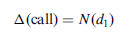


N(x) is the cumulative distribution function for a standard normal distribution. The formula gives delta for long position in call and put options.

__Gamma__
- The gamma of a portfolio of options on an underlying asset is the rate of change of the portfolio’s delta with respect to the price of the underlying asset. It is the second partial derivative of the portfolio with respect to asset price:
- If gamma is small, delta changes slowly,However, if gamma is highly negative or highly positive, delta is very sensitive to the price of the underlying asset.
- Unlike the delta, the Gamma is always a positive number for both Call and Put Option. 
- For a European call or put option on a non-dividend-paying stock, the gamma is given by
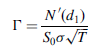
Here N'(x) is the probability density function of standard normal distribution and its value is :-

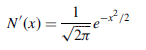

__Vega__
- value of a derivative is liable to change because of movements in volatility as well as because of changes in the asset price and the passage of time.
- The vega of a portfolio of derivatives, V, is the rate of change of the value of the portfolio with respect to the volatility of the underlying asset.
- If vega is highly positive or highly negative, the portfolio’s value is very sensitive to small changes in volatility. If it is close to zero, volatility changes have relatively little impact on the value of the portfolio.
- For a European call or put option on a non-dividend-paying stock, vega is given by
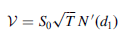
Here N'(x) is the probability density function of standard normal distribution
- Black–Scholes–Merton model and its extensions underlying the model assumes that volatility is constant. However,the vega calculated from a stochastic volatility model is very similar to the Black–Scholes–Merton vega, so the practice of calculating vega from a model in which volatility is constant works reasonably well.

__Rho__
- The rho of a portfolio of options is the rate of change of the value of the portfolio with respect to the interest rate
- For a European call option on a non-dividend-paying stock


- For a European put option Rho is given by:
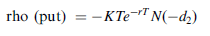

__Theta__
- The theta (time decay) of a portfolio of options is the rate of change of the value of the portfolio with respect to the passage of time with all else remaining the same.
- For a European call option on a non-dividend paying stock theta is given by
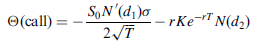

- For a European call option on a non-dividend paying stock theta is given by
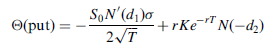
- Theta is usually negative for an option.7 This is because, as time passes with all else remaining the same, the option tends to become less valuable.
- Since unlike stock prices where there is uncertainity, there is no uncertainity about how the price of option will change with passage of time. The traders still calculates it with other greeks because theta is used as a proxy for gamma.

In [1]:
from Greeks import *
from stock_option import stockoption
from euro_option import *
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
stockopt = stockoption(217.58, 215, 0.05, 0.1,50,'Log',{'tk': 'AAPL', 'is_calc': True, 'start': '2017-08-18',
                                                     'end': '2018-08-18', 'eu_option':False,'is_call':False})

In [3]:
Opt_greek = Greeks(stockopt)

In [4]:
Opt_greek.delta(stockopt)

-5.163038723337306e-05

In [6]:
Opt_greek.vega(stockopt)

0.014614663964969141

In [7]:
Opt_greek.Gamma(stockopt)

0.00022378527529094878

In [8]:
Opt_greek.Rho(stockopt)

-0.0011045169114592699

In [9]:
Opt_greek.theta(stockopt)

0.0004098195453241965

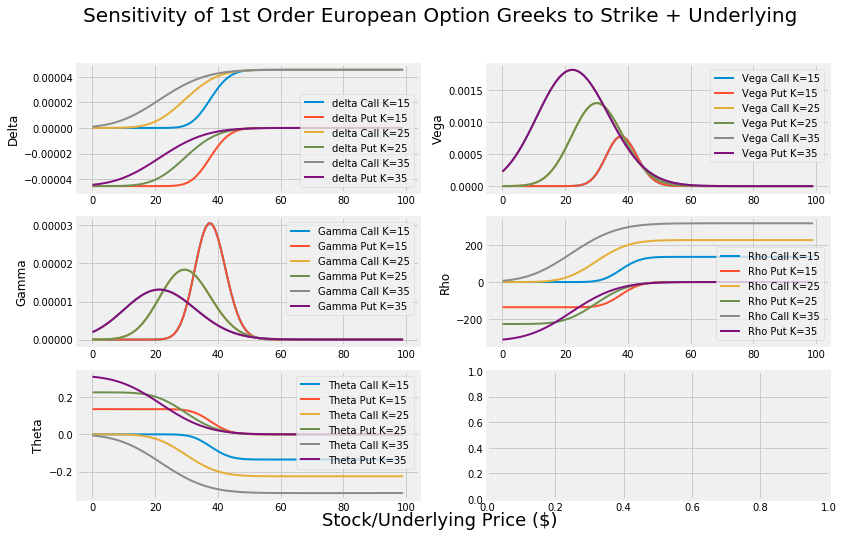

In [4]:
fig, ax = plt.subplots(nrows=3, ncols=2,figsize=(12,8))
fig.suptitle('Sensitivity of 1st Order European Option Greeks to Strike + Underlying', fontsize=20)
fig.text(0.5, 0.08, 'Stock/Underlying Price ($)', ha='center', fontsize=18)
vals = [15,25,35]
tmp_c =[]
tmp_p = []
s = 1
i = 15
r = 0.01
T = 10
stockopt_call = stockoption(s,i,r,T,50,'Log',{'tk': 'AAPL', 'is_calc': True,'start': '2017-08-18',
                                                      'end': '2018-08-18', 'eu_option':False,'div':1})
stockopt_put =  stockoption(s,i,r,T,50,'Log',{'tk': 'AAPL', 'is_calc': True,'start': '2017-08-18',
                                                      'end': '2018-08-18', 'eu_option':False,'is_call':False,'div':1})
plt.subplot(321)
for i in vals:
    for s in np.linspace(i-6,i+6,100):
        stockopt_call.S0 = s
        stockopt_call.K = i
        stockopt_put.S0 = s
        stockopt_put.K = i
        Opt_greek_call = Greeks(stockopt_call)
        Opt_greek_put = Greeks(stockopt_put)  
        tmp_c.append(Opt_greek_call.delta(stockopt_call)) 
        tmp_p.append(Opt_greek_put.delta(stockopt_put))
          
    plt.plot(tmp_c,label = ("delta Call K=%i" % i ),linewidth=2.0)
    plt.plot(tmp_p,label = ("delta Put K=%i" % i ),linewidth=2.0)
    tmp_c =[]
    tmp_p =[]
    
plt.ylabel("Delta")
plt.legend()

plt.subplot(322)
for i in vals:
    for s in np.linspace(i-6,i+6,100):
        stockopt_call.S0 = s
        stockopt_call.K = i
        stockopt_put.S0 = s
        stockopt_put.K = i
        Opt_greek_call = Greeks(stockopt_call)
        Opt_greek_put = Greeks(stockopt_put)
        tmp_c.append(Opt_greek_call.vega(stockopt_call)) 
        tmp_p.append(Opt_greek_put.vega(stockopt_put))
        
    plt.plot(tmp_c,label = ("Vega Call K=%i" % i ),linewidth=2.0)
    plt.plot(tmp_p,label = ("Vega Put K=%i" % i ),linewidth=2.0)
    tmp_c =[]
    tmp_p =[]

plt.ylabel("Vega")
plt.legend()

plt.subplot(323)
for i in vals:
    for s in np.linspace(i-6,i+6,100):
        stockopt_call.S0 = s
        stockopt_call.K = i
        stockopt_put.S0 = s
        stockopt_put.K = i
        Opt_greek_call = Greeks(stockopt_call)
        Opt_greek_put = Greeks(stockopt_put)
        tmp_c.append(Opt_greek_call.Gamma(stockopt_call)) 
        tmp_p.append(Opt_greek_put.Gamma(stockopt_put))
        
    plt.plot(tmp_c,label = ("Gamma Call K=%i" % i ),linewidth=2.0)
    plt.plot(tmp_p,label = ("Gamma Put K=%i" % i ),linewidth=2.0)
    tmp_c =[]
    tmp_p =[]

plt.ylabel("Gamma")
plt.legend()

plt.subplot(324)
for i in vals:
    for s in np.linspace(i-6,i+6,100):
        stockopt_call.S0 = s
        stockopt_call.K = i
        stockopt_put.S0 = s
        stockopt_put.K = i
        Opt_greek_call = Greeks(stockopt_call)
        Opt_greek_put = Greeks(stockopt_put)
        tmp_c.append(Opt_greek_call.Rho(stockopt_call)) 
        tmp_p.append(Opt_greek_put.Rho(stockopt_put))
        
    plt.plot(tmp_c,label = ("Rho Call K=%i" % i ),linewidth=2.0)
    plt.plot(tmp_p,label = ("Rho Put K=%i" % i ),linewidth=2.0)
    tmp_c =[]
    tmp_p =[]

    
plt.ylabel("Rho")
plt.legend()

plt.subplot(325)
for i in vals:
    for s in np.linspace(i-6,i+6,100):
        stockopt_call.S0 = s
        stockopt_call.K = i
        stockopt_put.S0 = s
        stockopt_put.K = i
        Opt_greek_call = Greeks(stockopt_call)
        Opt_greek_put = Greeks(stockopt_put)
        tmp_c.append(Opt_greek_call.theta(stockopt_call)) 
        tmp_p.append(Opt_greek_put.theta(stockopt_put))
        
    plt.plot(tmp_c,label = ("Theta Call K=%i" % i ),linewidth=2.0)
    plt.plot(tmp_p,label = ("Theta Put K=%i" % i ),linewidth=2.0)
    tmp_c =[]
    tmp_p =[]

plt.ylabel("Theta")
plt.legend()
plt.show()

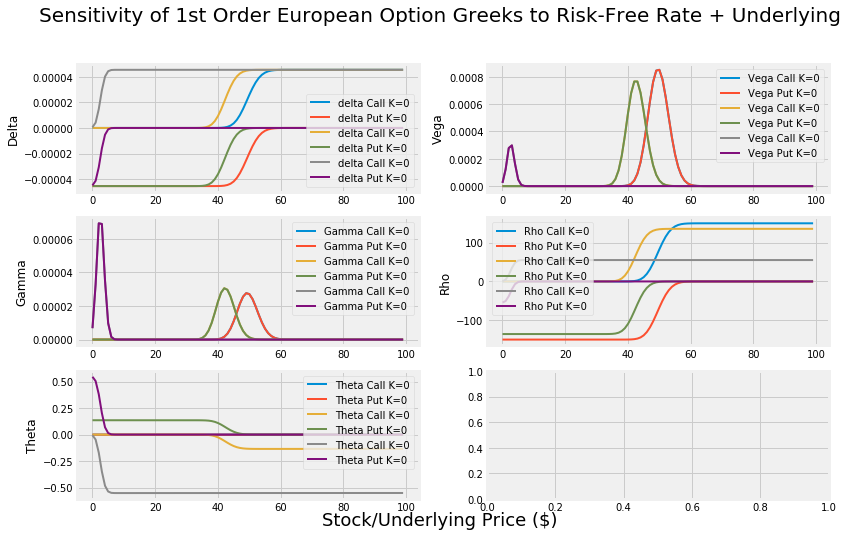

In [8]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(12,8))
fig.suptitle('Sensitivity of 1st Order European Option Greeks to Risk-Free Rate + Underlying', fontsize=20)
fig.text(0.5, 0.08, 'Stock/Underlying Price ($)', ha='center', fontsize=18)
tmp_c =[]
tmp_p = []

vals = [0,0.01,0.1]
s = 1
k = 15
i = 0
T = 10
stockopt_call = stockoption(s,k,i,T,50,'Log',{'tk': 'AAPL', 'is_calc': True,'start': '2017-08-18',
                                                      'end': '2018-08-18', 'eu_option':False,'div':1})
stockopt_put =  stockoption(s,k,i,T,50,'Log',{'tk': 'AAPL', 'is_calc': True,'start': '2017-08-18',
                                                      'end': '2018-08-18', 'eu_option':False,'is_call':False,'div':1})
plt.subplot(321)
for i in vals:
    for s in np.linspace(5,25,100):
        stockopt_call.S0 = s
        stockopt_call.r = i
        stockopt_put.S0 = s
        stockopt_put.r = i
        Opt_greek_call = Greeks(stockopt_call)
        Opt_greek_put = Greeks(stockopt_put)  
        tmp_c.append(Opt_greek_call.delta(stockopt_call)) 
        tmp_p.append(Opt_greek_put.delta(stockopt_put))
          
    plt.plot(tmp_c,label = ("delta Call K=%i" % i ),linewidth=2.0)
    plt.plot(tmp_p,label = ("delta Put K=%i" % i ),linewidth=2.0)
    tmp_c =[]
    tmp_p =[]
    
plt.ylabel("Delta")
plt.legend()

plt.subplot(322)
for i in vals:
    for s in np.linspace(5,25,100):
        stockopt_call.S0 = s
        stockopt_call.r = i
        stockopt_put.S0 = s
        stockopt_put.r = i
        Opt_greek_call = Greeks(stockopt_call)
        Opt_greek_put = Greeks(stockopt_put)
        tmp_c.append(Opt_greek_call.vega(stockopt_call)) 
        tmp_p.append(Opt_greek_put.vega(stockopt_put))
        
    plt.plot(tmp_c,label = ("Vega Call K=%i" % i ),linewidth=2.0)
    plt.plot(tmp_p,label = ("Vega Put K=%i" % i ),linewidth=2.0)
    tmp_c =[]
    tmp_p =[]

plt.ylabel("Vega")
plt.legend()

plt.subplot(323)
for i in vals:
    for s in np.linspace(5,25,100):
        stockopt_call.S0 = s
        stockopt_call.r = i
        stockopt_put.S0 = s
        stockopt_put.r = i
        Opt_greek_call = Greeks(stockopt_call)
        Opt_greek_put = Greeks(stockopt_put)
        tmp_c.append(Opt_greek_call.Gamma(stockopt_call)) 
        tmp_p.append(Opt_greek_put.Gamma(stockopt_put))
        
    plt.plot(tmp_c,label = ("Gamma Call K=%i" % i ),linewidth=2.0)
    plt.plot(tmp_p,label = ("Gamma Put K=%i" % i ),linewidth=2.0)
    tmp_c =[]
    tmp_p =[]

plt.ylabel("Gamma")
plt.legend()

plt.subplot(324)
for i in vals:
    for s in np.linspace(5,25,100):
        stockopt_call.S0 = s
        stockopt_call.r = i
        stockopt_put.S0 = s
        stockopt_put.r = i
        Opt_greek_call = Greeks(stockopt_call)
        Opt_greek_put = Greeks(stockopt_put)
        tmp_c.append(Opt_greek_call.Rho(stockopt_call)) 
        tmp_p.append(Opt_greek_put.Rho(stockopt_put))
        
    plt.plot(tmp_c,label = ("Rho Call K=%i" % i ),linewidth=2.0)
    plt.plot(tmp_p,label = ("Rho Put K=%i" % i ),linewidth=2.0)
    tmp_c =[]
    tmp_p =[]

    
plt.ylabel("Rho")
plt.legend()

plt.subplot(325)
for i in vals:
    for s in np.linspace(5,25,100):
        stockopt_call.S0 = s
        stockopt_call.r = i
        stockopt_put.S0 = s
        stockopt_put.r = i
        Opt_greek_call = Greeks(stockopt_call)
        Opt_greek_put = Greeks(stockopt_put)
        tmp_c.append(Opt_greek_call.theta(stockopt_call)) 
        tmp_p.append(Opt_greek_put.theta(stockopt_put))
        
    plt.plot(tmp_c,label = ("Theta Call K=%i" % i ),linewidth=2.0)
    plt.plot(tmp_p,label = ("Theta Put K=%i" % i ),linewidth=2.0)
    tmp_c =[]
    tmp_p =[]

plt.ylabel("Theta")
plt.legend()
plt.show()